# Multiple Linear Regression

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Sony\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Load the predefined dataset
from sklearn.datasets import load_boston

In [3]:
dataset = load_boston()

In [4]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Independet Variable
X = dataset.data

In [7]:
columns_name = dataset.feature_names
print(columns_name)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# Create Pandas dataframe
df_boston = pd.DataFrame(X, columns=columns_name)

In [9]:
df_boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [10]:
# Y column
df_boston['Price'] =  dataset.target

In [11]:
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [12]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
df_boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [15]:
# Check the null value
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### 1. Linearity Assumption

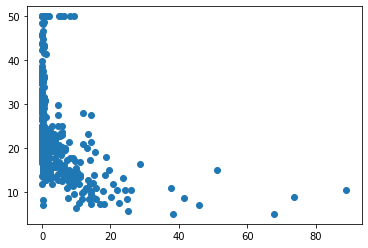

In [17]:
# scatter plot will be with PRICE and CRIM
plt.scatter(x = df_boston['CRIM'], y = df_boston['Price'])
plt.show()

In [21]:
col_name = df_boston.columns
print(col_name)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')


In [22]:
len(col_name)

14

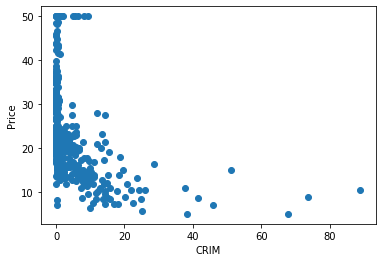

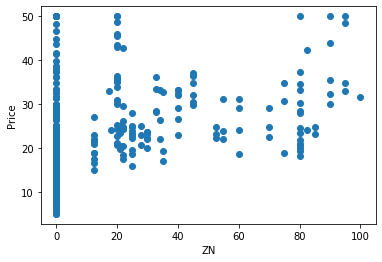

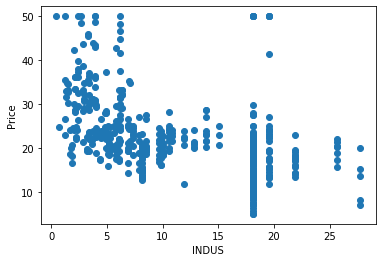

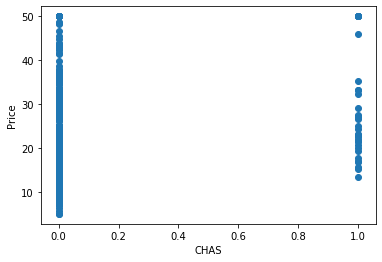

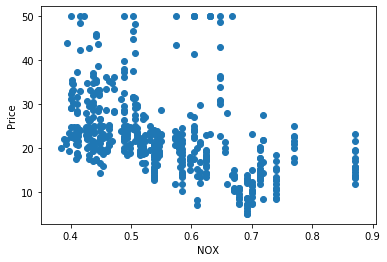

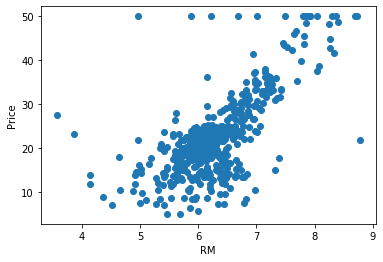

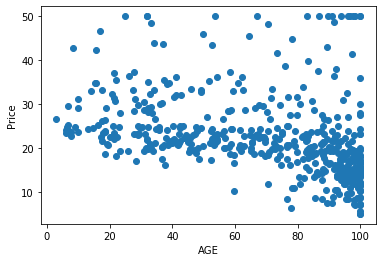

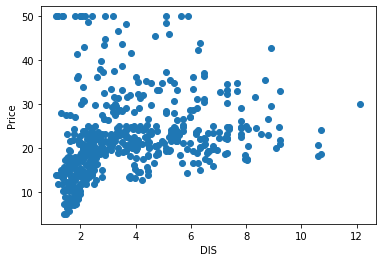

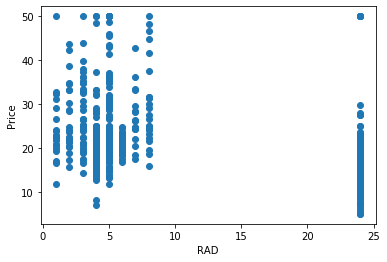

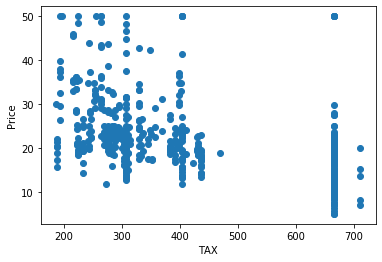

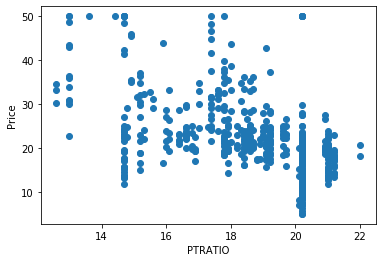

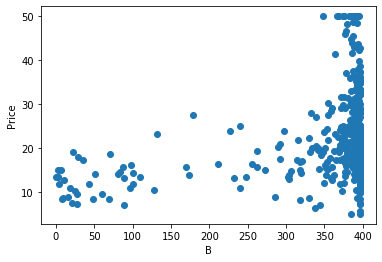

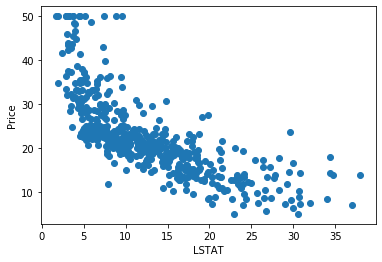

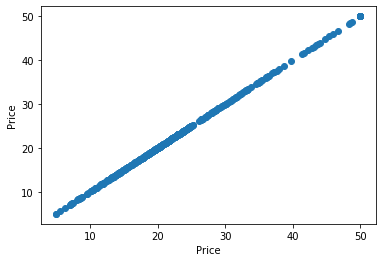

In [27]:
for col in col_name:
    plt.scatter(x = df_boston[col], y = df_boston['Price'])
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

### 3. Multicolinearity Test

In [34]:
# Test this using Correlation matrix
corr_mtx = df_boston.corr().round(2)

In [29]:
import seaborn as sns

C:\Users\Sony\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


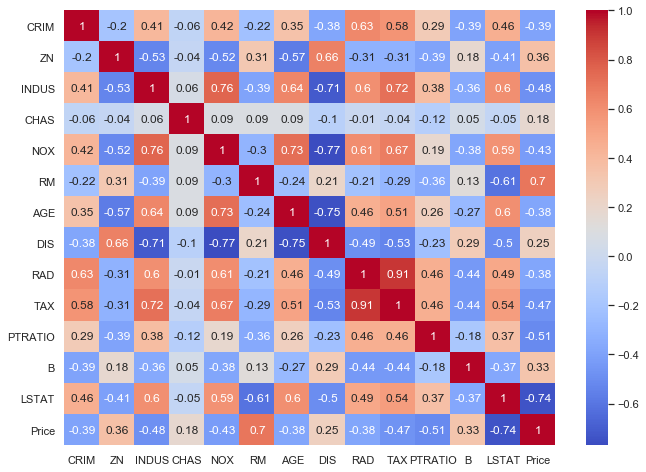

In [36]:
sns.set(rc = {"figure.figsize" : (11,8) })
sns.heatmap(data = corr_mtx, annot=True, cmap = 'coolwarm')

In [39]:
# Divide our data in X and y
X = df_boston.iloc[ : , 0:13]
y = df_boston.iloc[ :, -1]

In [41]:
# Split my data into Training and Test set
from sklearn.model_selection import train_test_split

In [42]:
# 80:20 i.e. 80% Training and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
X_train.shape

(404, 13)

In [44]:
X_test.shape

(102, 13)

In [45]:
# Build our Linear Regression (Multiple Linear Regression)
from sklearn.linear_model import LinearRegression

In [46]:
# create the model object
regressor = LinearRegression()

In [47]:
# Train the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# Coefficient of my model
regressor.coef_

array([-1.13551466e-01,  5.20943487e-02,  1.78893922e-02,  2.57517501e+00,
       -1.75577774e+01,  3.95020051e+00,  4.92033057e-04, -1.53376759e+00,
        3.32330177e-01, -1.44476023e-02, -8.51615728e-01,  9.32275449e-03,
       -5.13396108e-01])

In [49]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [51]:
# Test the accuracy
print("Model 1 - Accuracy is : ", regressor.score(X_test, y_test) )

Model 1 - Accuracy is :  0.7176621290697727


### Start of Model 2

In [52]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [53]:
X.drop(columns=['RAD'], axis = 1, inplace=True)

C:\Users\Sony\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296.0     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242.0     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242.0     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222.0     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [71]:
# 80:20 i.e. 80% Training and 20% Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2)

In [72]:
# Build the model 2
regressor2 = LinearRegression()

In [79]:
regressor2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# Test the accuracy
print("Model 2 - Accuracy is : ", regressor2.score(X_test2, y_test2) )

Model 2 - Accuracy is :  0.7907141452944833


In [81]:
regressor2.coef_

array([-8.85008010e-02,  2.92328584e-02, -4.01521767e-02,  3.62701672e+00,
       -1.80849007e+01,  4.30931229e+00, -5.49297634e-03, -1.53550640e+00,
        4.85760747e-03, -7.88125021e-01,  9.08408562e-03, -5.34027698e-01])

In [83]:
# Test our Assumption

### 2. Homoscedascity Assumption

In [84]:
y_pred = regressor2.predict(X_test2)

In [87]:
error = y_test2 - y_pred # Subtraction

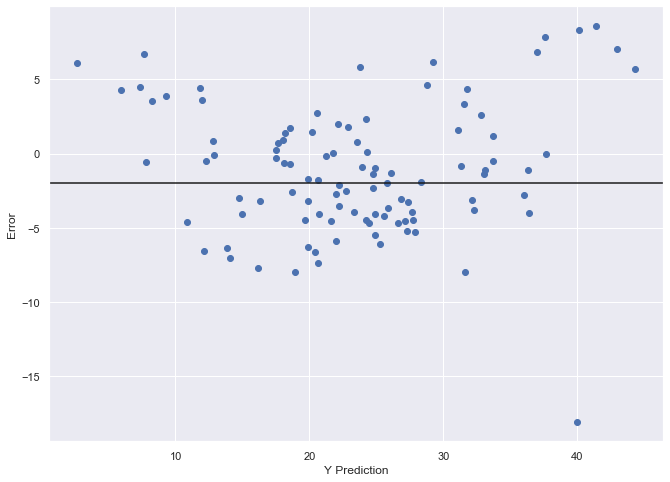

In [90]:
plt.plot(y_pred, error, 'bo')
plt.axhline(y = -2, color = 'k')
plt.xlabel("Y Prediction")
plt.ylabel("Error")
plt.show()

### 4 No autorcreateion on residuals (error) using ACF plot

In [91]:
from statsmodels.graphics.tsaplots import plot_acf

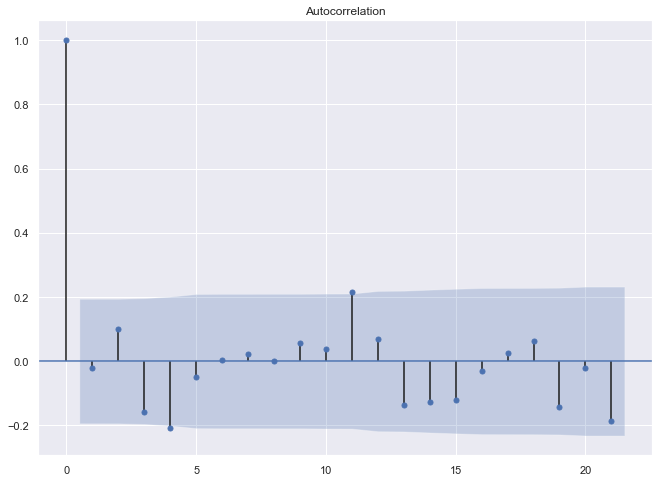

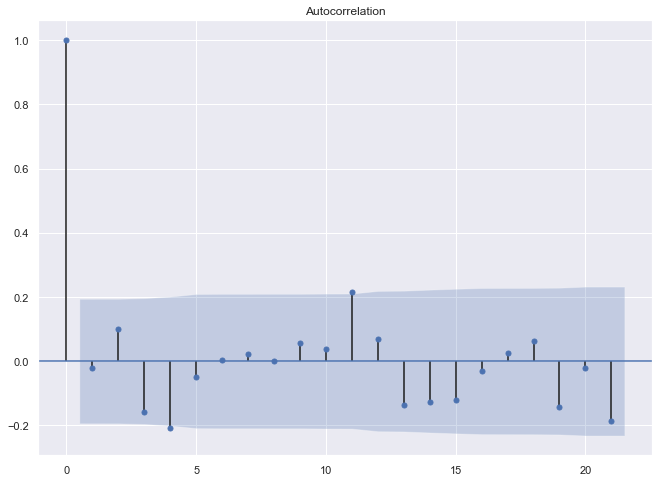

In [92]:
plot_acf(error)

In [93]:
from statsmodels.api import OLS

In [95]:
OLS(y_train2, X_train2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              725.9
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                   4.02e-259
Time:                        08:17:30   Log-Likelihood:                         -1226.9
No. Observations:                 404   AIC:                                      2478.
Df Residuals:                     392   BIC:                                      2526.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0931      0.036     -2.593      0.010      -0.164      -0.022
ZN             0.0364      0.017      2.101      0.036       0.002       0.071
INDUS         -0.0341      0.069     -0.491      0.624      -0.171       0.103
CHAS           3.7817      1.017      3.720      0.000       1.783       5.780
NOX           -6.6816      3.836     -1.742      0.082     -14.224       0.861
RM             6.0211      0.356     16.924      0.000       5.322       6.721
AGE           -0.0098      0.016     -0.630      0.529      -0.040       0.021
DIS           -1.1429      0.227     -5.024      0.000      -1.590      -0.696
TAX            0.0024      0.003      0.894      0.372      -0.003       0.008
PTRATIO       -0.3665      0.127     -2.889      0.004      -0.616      -0.117
B              0.0142      0.003      4.682      0.000       0.008       0.020
LSTAT         -0.4457      0.058     -7.742      0.000      -0.559      -0.332
==============================================================================
Omnibus:                      171.804   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              907.386
Skew:                           1.767   Prob(JB):                    9.20e-198
Kurtosis:                       9.436   Cond. No.                     8.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5 Assumption.Residual should be normally distributed 

AttributeError: 'Rectangle' object has no property 'bin'

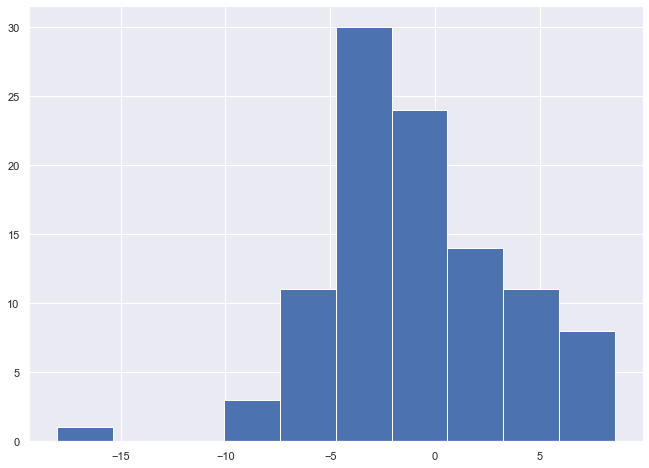

In [101]:
plt.hist(error, bin = 20)

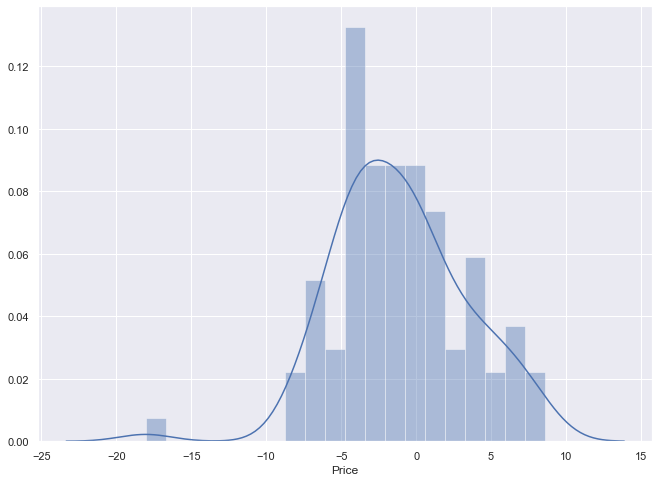

In [107]:
sns.distplot(error, bins = 20)

In [108]:
y_pred

array([27.62714785, 32.31268093,  7.3768094 , 19.88720341, 18.17448643,
       18.89125691, 19.92214229, 20.65813494, 18.68121089, 25.80122459,
       24.75507248, 20.39049039, 40.14460114, 22.13170405, 29.24250247,
       25.87331439, 25.57049843, 24.2580019 , 24.87980867, 27.86499763,
       24.29245505,  2.66962977, 14.71015027, 44.31520418,  5.90279261,
       12.27416693, 21.27025195, 24.89406587, 24.23517602, 21.98687495,
       42.94560972, 24.46890012, 33.72431466, 19.6613316 , 25.28672399,
       33.69935888, 41.40944418, 24.71825527, 19.90821627, 31.07860214,
       20.66351314,  7.77198527, 24.86935109, 17.49405281, 35.97683711,
       12.12665751, 32.09941095, 32.79290427, 12.76851323, 18.00611753,
       27.75361764, 39.94165163, 14.99328615, 36.38094264, 18.56105923,
       28.74573565, 11.98139479, 22.2027712 , 37.5576703 , 21.60655087,
       12.87100162, 18.11262628, 31.60038275,  8.24386224, 20.54571594,
        7.67089622, 26.85754793, 17.52747077, 22.91158654, 22.21

In [109]:
X_test.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
161  1.46336   0.0  19.58   0.0  0.605  7.489  90.8  1.9709   5.0  403.0   
12   0.09378  12.5   7.87   0.0  0.524  5.889  39.0  5.4509   5.0  311.0   
169  2.44953   0.0  19.58   0.0  0.605  6.402  95.2  2.2625   5.0  403.0   
485  3.67367   0.0  18.10   0.0  0.583  6.312  51.9  3.9917  24.0  666.0   
111  0.10084   0.0  10.01   0.0  0.547  6.715  81.6  2.6775   6.0  432.0   

     PTRATIO       B  LSTAT  
161     14.7  374.43   1.73  
12      15.2  390.50  15.71  
169     14.7  330.04  11.32  
485     20.2  388.62  10.58  
111     17.8  395.59  10.16

In [110]:
X_test['pred_y'] = y_pred

C:\Users\Sony\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
X_test.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
161  1.46336   0.0  19.58   0.0  0.605  7.489  90.8  1.9709   5.0  403.0   
12   0.09378  12.5   7.87   0.0  0.524  5.889  39.0  5.4509   5.0  311.0   
169  2.44953   0.0  19.58   0.0  0.605  6.402  95.2  2.2625   5.0  403.0   
485  3.67367   0.0  18.10   0.0  0.583  6.312  51.9  3.9917  24.0  666.0   
111  0.10084   0.0  10.01   0.0  0.547  6.715  81.6  2.6775   6.0  432.0   

     PTRATIO       B  LSTAT     pred_y  
161     14.7  374.43   1.73  27.627148  
12      15.2  390.50  15.71  32.312681  
169     14.7  330.04  11.32   7.376809  
485     20.2  388.62  10.58  19.887203  
111     17.8  395.59  10.16  18.174486